# Loading Libraries

In [7]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
data <- read.csv("heart.csv")

In [10]:
head(data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [16]:
summary(data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

# Data Transformation

In [17]:
data2 <- data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

# Data Visualization

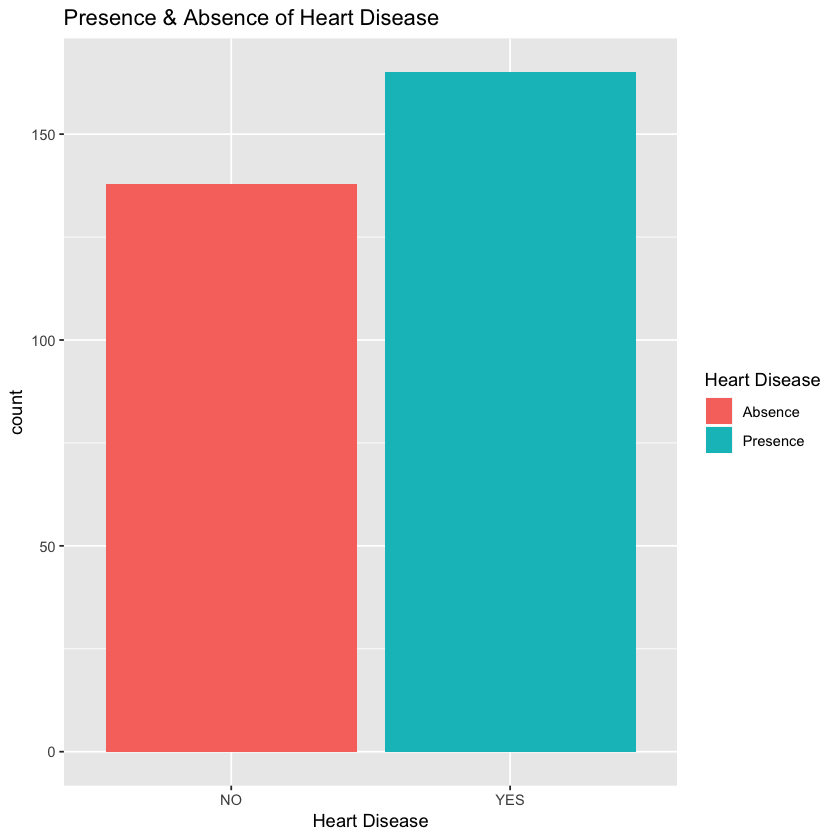

In [18]:
# Bar plot for target
ggplot(data2, aes(x=data2$target, fill=data2$target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete(name= 'Heart Disease', labels =c("Absence", "Presence"))